# A Decision Tree Classifier in Python

In [1]:
# For Python 2 / 3 compatability
from __future__ import print_function

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




In [4]:
# reading csv file
df = pd.read_csv("cardio_train.csv", delimiter= ";")

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.drop('id', inplace=True, axis=1)

In [8]:
list(df)[:-1]

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [9]:
df['age'] = np.ceil(df['age']/365)

In [10]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.837914,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766821,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,59.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


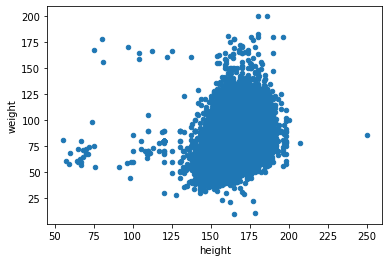

In [15]:
df.plot.scatter(x = 'height', y = 'weight', s = 20);

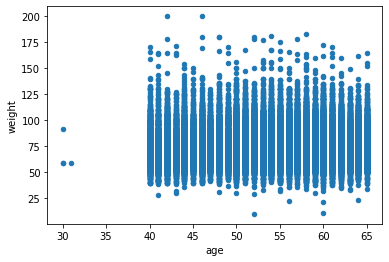

In [16]:
df.plot.scatter(x = 'age', y = 'weight', s = 20);

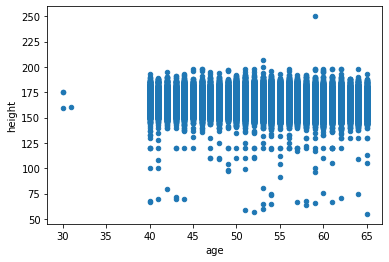

In [17]:
df.plot.scatter(x = 'age', y = 'height', s = 20);

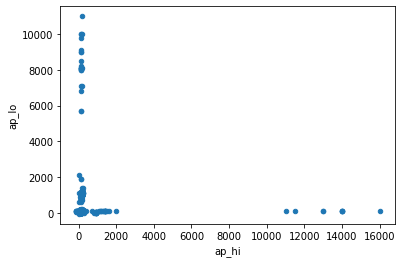

In [18]:
df.plot.scatter(x = 'ap_hi', y = 'ap_lo', s = 20);

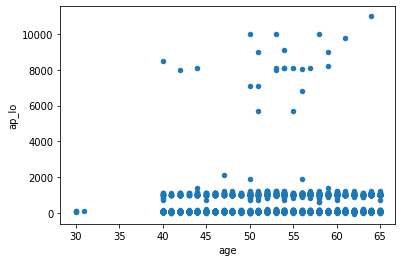

In [19]:
df.plot.scatter(x = 'age', y = 'ap_lo', s = 20);

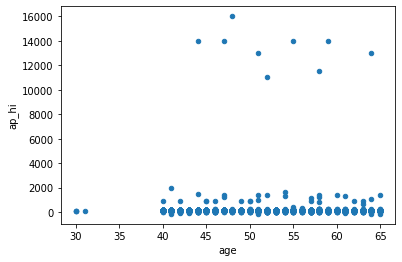

In [20]:
df.plot.scatter(x = 'age', y = 'ap_hi', s = 20);

## Replace columns values with corresponding category


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_text_genre, df.cardio , test_size = 0.1, random_state=42)

In [22]:
print(df)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      51.0       2     168    62.0    110     80            1     1      0   
1      56.0       1     156    85.0    140     90            3     1      0   
2      52.0       1     165    64.0    130     70            3     1      0   
3      49.0       2     169    82.0    150    100            1     1      0   
4      48.0       1     156    56.0    100     60            1     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  53.0       2     168    76.0    120     80            1     1      1   
69996  62.0       1     158   126.0    140     90            2     2      0   
69997  53.0       2     183   105.0    180     90            3     1      0   
69998  62.0       1     163    72.0    135     80            1     2      0   
69999  57.0       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
0         0       1  

### Advantages of Discetization :
- The probabilistic predictions returned decision tree are monotonically related to the target.
- The new bins show decreased entropy, this is the observations within each bucket/bin are more similar to themselves than to those of other buckets/bins.
- The tree finds the bins automatically.

### Disadvantages of Discretization:

- It may cause over-fitting
- More importantly, some tuning of tree parameters might need to be done to obtain the optimal splits (e.g., depth, the minimum number of samples in one partition, the maximum number of partitions, and a minimum information gain). This it can be time-consuming.

##  Build a classification tree using the `age` to predict cardiovascular disease in order to `discretise the age` variable.

In [ ]:
#  Rename df to df 

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(df.age.to_frame(), df.cardio)
df['age_tree']=tree_model.predict_proba(df.age.to_frame())[:,1] 
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_tree
0,51.0,2,168,62.0,110,80,1,1,0,0,1,0,0.452588
1,56.0,1,156,85.0,140,90,3,1,0,0,1,1,0.568092
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0.452588
3,49.0,2,169,82.0,150,100,1,1,0,0,1,1,0.452588
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,0.452588
5,61.0,1,151,67.0,120,80,2,2,0,0,0,0,0.568092
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0,0.568092
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1,0.698142
8,49.0,1,158,71.0,110,70,1,1,0,0,1,0,0.452588
9,55.0,1,164,68.0,110,60,1,1,0,0,0,0,0.452588


gender
1    45530
2    24470
dtype: int64

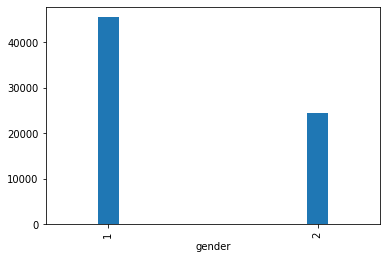

In [24]:
group_age = df.groupby(['gender'])['cardio'].count().plot.bar(width= .1)
group_age

gender_groups = df.groupby('gender')
gender_groups.first()
gender_groups.size()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco,active,cardio,age_tree
gluc,,,,,,,,,,,,
1,51.0,2,168,62.0,110,80,1,0,0,1,0,0.452588
2,61.0,1,151,67.0,120,80,2,0,0,0,0,0.568092
3,62.0,2,178,95.0,130,90,3,0,0,1,1,0.698142


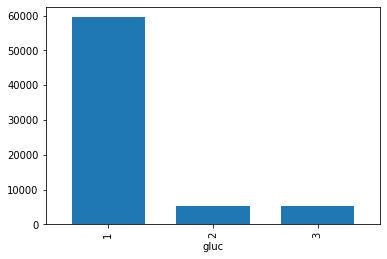

In [25]:
group_gluc = df.groupby(['gluc'])['cardio'].count().plot.bar(width= .7)
group_gluc

gluc_groups = df.groupby('gluc')
gluc_groups.first()


# bins = df.gluc.unique()
# print(bins)

<AxesSubplot:ylabel='age_tree'>

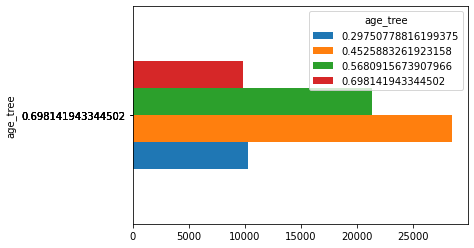

In [26]:
# group_age_tree = df.groupby(['age_tree'])['cardio'].count().plot.bar(width= .1)
df.groupby('age_tree').age_tree.value_counts().unstack(0).plot.barh()


In [27]:
age_tree_groups = df.groupby('age_tree')
age_tree_groups.first()
# age_tree_groups.size()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age_tree,,,,,,,,,,,,
0.297508,41.0,2,165,60.0,120,80,1,1,0,0,0,0
0.452588,51.0,2,168,62.0,110,80,1,1,0,0,1,0
0.568092,56.0,1,156,85.0,140,90,3,1,0,0,1,1
0.698142,62.0,2,178,95.0,130,90,3,3,0,0,1,1


In [28]:
# Checking Age limit buckets generated by the tree
pd.concat( [df.groupby(['age_tree'])['age'].min(),
            df.groupby(['age_tree'])['age'].max()], axis=1)

,age,age
age_tree,,
0.297508,30.0,45.0
0.452588,46.0,55.0
0.568092,56.0,61.0
0.698142,62.0,65.0


In [29]:
# Checking the number of unique values present in Age_treevariable
df.age_tree.unique()

# A tree of depth 2, makes 2 splits, therefore generating 4 buckets,
# that is why we see 4 different probabilities in the output above.

array([0.45258833, 0.56809157, 0.69814194, 0.29750779])

Text(0, 0.5, 'cardio')

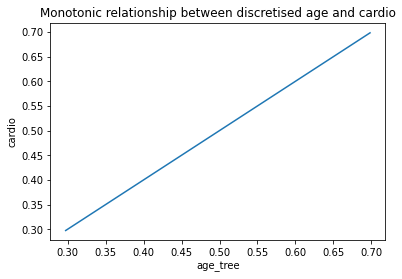

In [30]:
# Check the relationship between the discretized variable age_tree and the target cardio.
fig = plt.figure()
fig = df.groupby(['age_tree'])['cardio'].mean().plot()
fig.set_title('Monotonic relationship between discretised age and cardio')
fig.set_ylabel('cardio')

#  That plot suggests that age_tree seems like a good predictor of the target variable cardio .


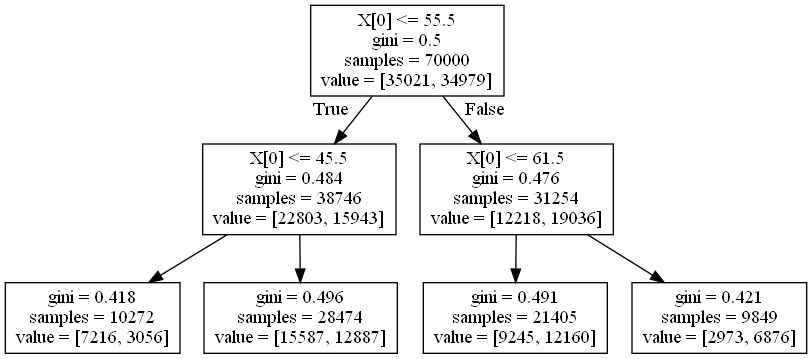

In [31]:
# Visualizing the tree.
from sklearn import tree
from graphviz import Source

# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

dot_file = "age_tree_model.gv"
with open(dot_file, "w") as f:
    f = tree.export_graphviz(tree_model, out_file=f)
    
s = Source.from_file(dot_file, format='png')
s.view()    
    
from IPython.display import Image
Image(filename=f'{dot_file}.png')     
    

###  Build a classification tree using the `height` to predict cardiovascular disease in order to `discretise the height` variable.

In [32]:
tree_model1 = DecisionTreeClassifier(max_depth=2)
tree_model1.fit(df.height.to_frame(), df.cardio)
df['height_tree']=tree_model1.predict_proba(df.height.to_frame())[:,1] 
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_tree,height_tree
0,51.0,2,168,62.0,110,80,1,1,0,0,1,0,0.452588,0.493174
1,56.0,1,156,85.0,140,90,3,1,0,0,1,1,0.568092,0.516693
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0.452588,0.493174
3,49.0,2,169,82.0,150,100,1,1,0,0,1,1,0.452588,0.493174
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,0.452588,0.516693
5,61.0,1,151,67.0,120,80,2,2,0,0,0,0,0.568092,0.535870
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0,0.568092,0.493174
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1,0.698142,0.512042
8,49.0,1,158,71.0,110,70,1,1,0,0,1,0,0.452588,0.493174
9,55.0,1,164,68.0,110,60,1,1,0,0,0,0,0.452588,0.493174


<AxesSubplot:ylabel='height_tree'>

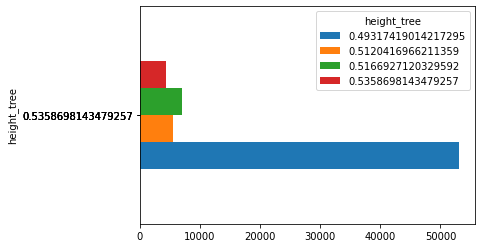

In [33]:
df.groupby('height_tree').height_tree.value_counts().unstack(0).plot.barh()

In [34]:
height_tree_groups = df.groupby('height_tree')
height_tree_groups.first()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_tree
height_tree,,,,,,,,,,,,,
0.493174,51.0,2,168,62.0,110,80,1,1,0,0,1,0,0.452588
0.512042,62.0,2,178,95.0,130,90,3,3,0,0,1,1,0.698142
0.516693,56.0,1,156,85.0,140,90,3,1,0,0,1,1,0.568092
0.535870,61.0,1,151,67.0,120,80,2,2,0,0,0,0,0.568092


In [35]:
height_tree_groups.size()

height_tree
0.493174    53034
0.512042     5564
0.516693     7039
0.535870     4363
dtype: int64

In [36]:
pd.concat( [df.groupby(['height_tree'])['height'].min(),
            df.groupby(['height_tree'])['height'].max()], axis=1)

,height,height
height_tree,,
0.493174,157,175
0.512042,176,250
0.516693,153,156
0.535870,55,152


In [37]:
df.height_tree.unique()

array([0.49317419, 0.51669271, 0.53586981, 0.5120417 ])

Text(0, 0.5, 'cardio')

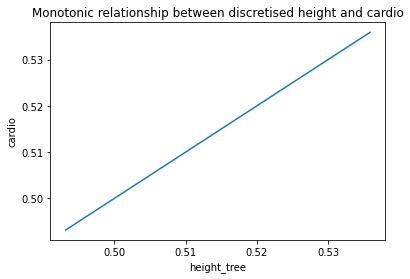

In [38]:
# Check the relationship between the discretized variable age_tree and the target cardio.
# That plot suggests that age_tree seems like a good predictor of the target variable cardio .
fig = plt.figure()
fig = df.groupby(['height_tree'])['cardio'].mean().plot()
fig.set_title('Monotonic relationship between discretised height and cardio')
fig.set_ylabel('cardio')

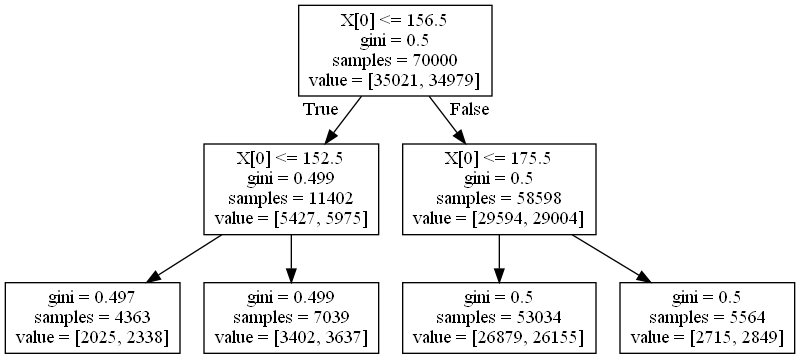

In [39]:
# Visualizing the tree.
from sklearn import tree
from graphviz import Source

dot_file = "height_tree_model.gv"
with open(dot_file, "w") as f:
    f = tree.export_graphviz(tree_model1, out_file=f)
    
s = Source.from_file(dot_file, format='png')
s.view()    
    
from IPython.display import Image
Image(filename=f'{dot_file}.png')     


###  Build a classification tree using the `weight` to predict cardiovascular disease in order to `discretise the weight` variable.

In [40]:
tree_model2 = DecisionTreeClassifier(max_depth=2)
tree_model2.fit(df.weight.to_frame(), df.cardio)
df['weight_tree']=tree_model2.predict_proba(df.weight.to_frame())[:,1] 
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_tree,height_tree,weight_tree
0,51.0,2,168,62.0,110,80,1,1,0,0,1,0,0.452588,0.493174,0.377572
1,56.0,1,156,85.0,140,90,3,1,0,0,1,1,0.568092,0.516693,0.579405
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0.452588,0.493174,0.473826
3,49.0,2,169,82.0,150,100,1,1,0,0,1,1,0.452588,0.493174,0.579405
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,0.452588,0.516693,0.377572
5,61.0,1,151,67.0,120,80,2,2,0,0,0,0,0.568092,0.535870,0.473826
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0,0.568092,0.493174,0.668862
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1,0.698142,0.512042,0.668862
8,49.0,1,158,71.0,110,70,1,1,0,0,1,0,0.452588,0.493174,0.473826
9,55.0,1,164,68.0,110,60,1,1,0,0,0,0,0.452588,0.493174,0.473826


<AxesSubplot:ylabel='weight_tree'>

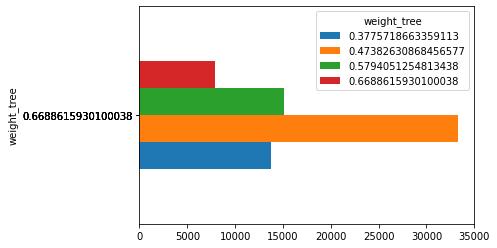

In [41]:
df.groupby('weight_tree').weight_tree.value_counts().unstack(0).plot.barh()

In [42]:
weight_tree_groups = df.groupby('weight_tree')
weight_tree_groups.first()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_tree,height_tree
weight_tree,,,,,,,,,,,,,,
0.377572,51.0,2,168,62.0,110,80,1,1,0,0,1,0,0.452588,0.493174
0.473826,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0.452588,0.493174
0.579405,56.0,1,156,85.0,140,90,3,1,0,0,1,1,0.568092,0.516693
0.668862,61.0,1,157,93.0,130,80,3,1,0,0,1,0,0.568092,0.493174


In [43]:
weight_tree_groups.size()

weight_tree
0.377572    13706
0.473826    33335
0.579405    15062
0.668862     7897
dtype: int64

In [44]:
pd.concat( [df.groupby(['weight_tree'])['weight'].min(),
            df.groupby(['weight_tree'])['weight'].max()], axis=1)

,weight,weight
weight_tree,,
0.377572,10.0,62.4
0.473826,62.5,78.2
0.579405,78.5,91.0
0.668862,92.0,200.0


In [45]:
df.weight_tree.unique()

array([0.37757187, 0.57940513, 0.47382631, 0.66886159])

Text(0, 0.5, 'cardio')

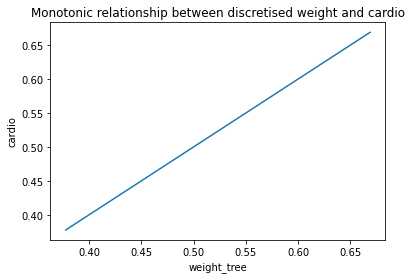

In [46]:
# Check the relationship between the discretized variable weight_tree and the target cardio.
fig = plt.figure()
fig = df.groupby(['weight_tree'])['cardio'].mean().plot()
fig.set_title('Monotonic relationship between discretised weight and cardio')
fig.set_ylabel('cardio')

#  That plot suggests that weight_tree seems like a good predictor of the target variable cardio .


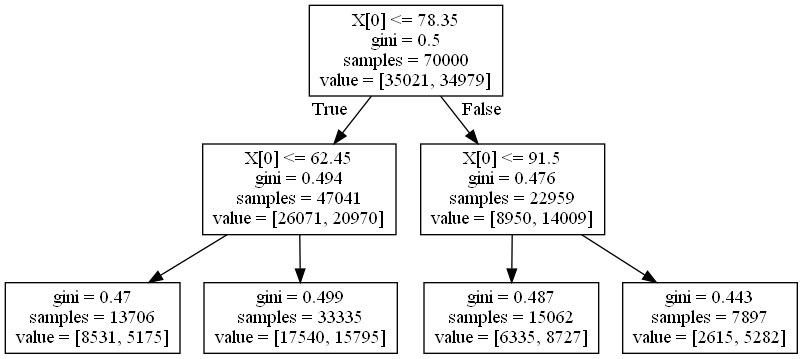

In [47]:
# Visualizing the tree.
from sklearn import tree
from graphviz import Source

dot_file = "weight_tree_model.gv"
with open(dot_file, "w") as f:
    f = tree.export_graphviz(tree_model2, out_file=f)
    
s = Source.from_file(dot_file, format='png')
s.view()    
    
from IPython.display import Image
Image(filename=f'{dot_file}.png')     

###  Build a classification tree using the `ap_lo` to predict cardiovascular disease in order to `discretise the ap_lo` variable. dyastolic

In [48]:
tree_model3 = DecisionTreeClassifier(max_depth=2)
tree_model3.fit(df.ap_lo.to_frame(), df.cardio)
df['ap_lo_tree']=tree_model3.predict_proba(df.ap_lo.to_frame())[:,1] 
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_tree,height_tree,weight_tree,ap_lo_tree
0,51.0,2,168,62.0,110,80,1,1,0,0,1,0,0.452588,0.493174,0.377572,0.425413
1,56.0,1,156,85.0,140,90,3,1,0,0,1,1,0.568092,0.516693,0.579405,0.748377
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0.452588,0.493174,0.473826,0.278570
3,49.0,2,169,82.0,150,100,1,1,0,0,1,1,0.452588,0.493174,0.579405,0.836214
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,0.452588,0.516693,0.377572,0.278570
5,61.0,1,151,67.0,120,80,2,2,0,0,0,0,0.568092,0.535870,0.473826,0.425413
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0,0.568092,0.493174,0.668862,0.425413
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1,0.698142,0.512042,0.668862,0.748377
8,49.0,1,158,71.0,110,70,1,1,0,0,1,0,0.452588,0.493174,0.473826,0.278570
9,55.0,1,164,68.0,110,60,1,1,0,0,0,0,0.452588,0.493174,0.473826,0.278570


<AxesSubplot:ylabel='ap_lo_tree'>

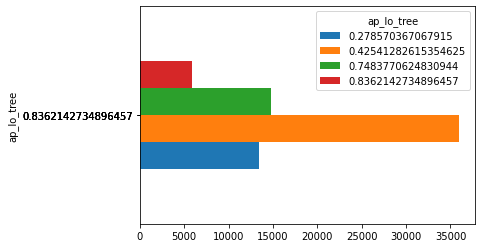

In [49]:
df.groupby('ap_lo_tree').ap_lo_tree.value_counts().unstack(0).plot.barh()

In [50]:
ap_lo_tree_groups = df.groupby('ap_lo_tree')
ap_lo_tree_groups.first()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_tree,height_tree,weight_tree
ap_lo_tree,,,,,,,,,,,,,,,
0.278570,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0.452588,0.493174,0.473826
0.425413,51.0,2,168,62.0,110,80,1,1,0,0,1,0,0.452588,0.493174,0.377572
0.748377,56.0,1,156,85.0,140,90,3,1,0,0,1,1,0.568092,0.516693,0.579405
0.836214,49.0,2,169,82.0,150,100,1,1,0,0,1,1,0.452588,0.493174,0.579405


In [51]:
ap_lo_tree_groups.size()

ap_lo_tree
0.278570    13458
0.425413    35911
0.748377    14788
0.836214     5843
dtype: int64

In [52]:
pd.concat( [df.groupby(['ap_lo_tree'])['ap_lo'].min(),
            df.groupby(['ap_lo_tree'])['ap_lo'].max()], axis=1)

,ap_lo,ap_lo
ap_lo_tree,,
0.278570,-70,73
0.425413,74,85
0.748377,86,98
0.836214,99,11000


In [53]:
df.ap_lo_tree.unique()

array([0.42541283, 0.74837706, 0.27857037, 0.83621427])

Text(0, 0.5, 'cardio')

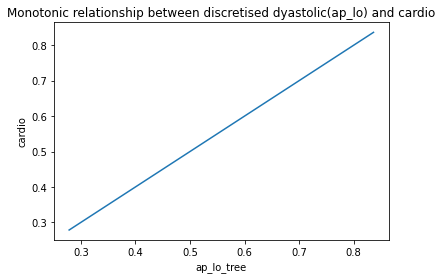

In [54]:
# Check the relationship between the discretized variable age_tree and the target cardio.
fig = plt.figure()
fig = df.groupby(['ap_lo_tree'])['cardio'].mean().plot()
fig.set_title('Monotonic relationship between discretised dyastolic(ap_lo) and cardio')
fig.set_ylabel('cardio')

#  That plot suggests that age_tree seems like a good predictor of the target variable cardio .

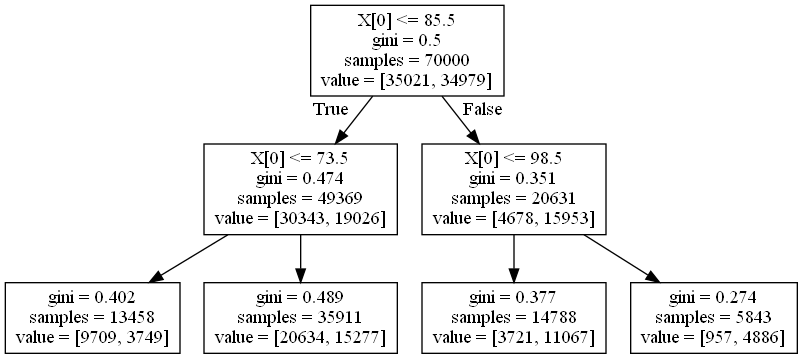

In [55]:
# Visualizing the tree.
from sklearn import tree
from graphviz import Source

dot_file = "ap_lo_tree_model.gv"
with open(dot_file, "w") as f:
    f = tree.export_graphviz(tree_model3, out_file=f)
    
s = Source.from_file(dot_file, format='png')
s.view()    
    
from IPython.display import Image
Image(filename=f'{dot_file}.png')     

###  Build a classification tree using the `api_hi` to predict cardiovascular disease in order to `discretise the api_hi` variable. Systolic

### Here I used the ROC_AUC to determine the best depth for the descritization

In [56]:
from sklearn.model_selection import cross_val_score

score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4, 5, 6]:
    tree_model4 = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model4, df.ap_hi.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4,5,6]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

# depth 3 or 4 will be suffietient for our case..

NameError: name 'y_train' is not defined

In [57]:
tree_model4 = DecisionTreeClassifier(max_depth=3)
tree_model4.fit(df.ap_hi.to_frame(), df.cardio)
df['ap_hi_tree']=tree_model4.predict_proba(df.ap_hi.to_frame())[:,1] 
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_tree,height_tree,weight_tree,ap_lo_tree,ap_hi_tree
0,51.0,2,168,62.0,110,80,1,1,0,0,1,0,0.452588,0.493174,0.377572,0.425413,0.233271
1,56.0,1,156,85.0,140,90,3,1,0,0,1,1,0.568092,0.516693,0.579405,0.748377,0.815514
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0.452588,0.493174,0.473826,0.278570,0.596359
3,49.0,2,169,82.0,150,100,1,1,0,0,1,1,0.452588,0.493174,0.579405,0.836214,0.861431
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,0.452588,0.516693,0.377572,0.278570,0.233271
5,61.0,1,151,67.0,120,80,2,2,0,0,0,0,0.568092,0.535870,0.473826,0.425413,0.355663
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0,0.568092,0.493174,0.668862,0.425413,0.596359
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1,0.698142,0.512042,0.668862,0.748377,0.596359
8,49.0,1,158,71.0,110,70,1,1,0,0,1,0,0.452588,0.493174,0.473826,0.278570,0.233271
9,55.0,1,164,68.0,110,60,1,1,0,0,0,0,0.452588,0.493174,0.473826,0.278570,0.233271


<AxesSubplot:ylabel='ap_hi_tree'>

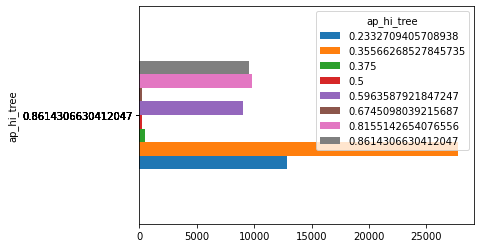

In [58]:
df.groupby('ap_hi_tree').ap_hi_tree.value_counts().unstack(0).plot.barh()

In [59]:
ap_hi_tree_groups = df.groupby('ap_hi_tree')
ap_hi_tree_groups.first()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_tree,height_tree,weight_tree,ap_lo_tree
ap_hi_tree,,,,,,,,,,,,,,,,
0.233271,51.0,2,168,62.0,110,80,1,1,0,0,1,0,0.452588,0.493174,0.377572,0.425413
0.355663,61.0,1,151,67.0,120,80,2,2,0,0,0,0,0.568092,0.535870,0.473826,0.425413
0.375000,60.0,2,165,73.0,125,90,1,1,0,0,0,0,0.568092,0.493174,0.473826,0.748377
0.500000,59.0,1,168,78.0,14,90,2,1,0,0,1,1,0.568092,0.493174,0.473826,0.748377
0.596359,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0.452588,0.493174,0.473826,0.278570
0.674510,40.0,1,165,77.0,135,90,3,3,0,0,1,1,0.297508,0.493174,0.473826,0.748377
0.815514,56.0,1,156,85.0,140,90,3,1,0,0,1,1,0.568092,0.516693,0.579405,0.748377
0.861431,49.0,2,169,82.0,150,100,1,1,0,0,1,1,0.452588,0.493174,0.579405,0.836214


In [60]:
ap_hi_tree_groups.size()

ap_hi_tree
0.233271    12822
0.355663    27796
0.375000      520
0.500000      188
0.596359     9008
0.674510      255
0.815514     9849
0.861431     9562
dtype: int64

In [61]:
pd.concat( [df.groupby(['ap_hi_tree'])['ap_hi'].min(),
            df.groupby(['ap_hi_tree'])['ap_hi'].max()], axis=1)

,ap_hi,ap_hi
ap_hi_tree,,
0.233271,60,117
0.355663,118,124
0.375000,125,129
0.500000,-150,24
0.596359,130,134
0.674510,135,138
0.815514,139,149
0.861431,150,16020


In [62]:
df.ap_hi_tree.unique()

array([0.23327094, 0.81551427, 0.59635879, 0.86143066, 0.35566269,
       0.6745098 , 0.375     , 0.5       ])

Text(0, 0.5, 'cardio')

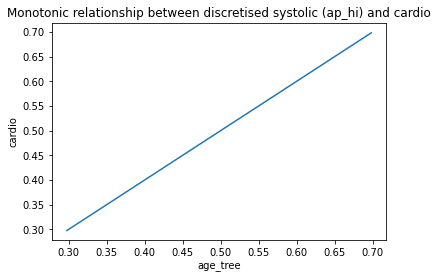

In [63]:

# Check the relationship between the discretized variable ap_hi_tree and the target cardio.
fig = plt.figure()
fig = df.groupby(['age_tree'])['cardio'].mean().plot()
fig.set_title('Monotonic relationship between discretised systolic (ap_hi) and cardio')
fig.set_ylabel('cardio')

#  That plot suggests that age_tree seems like a good predictor of the target variable cardio .

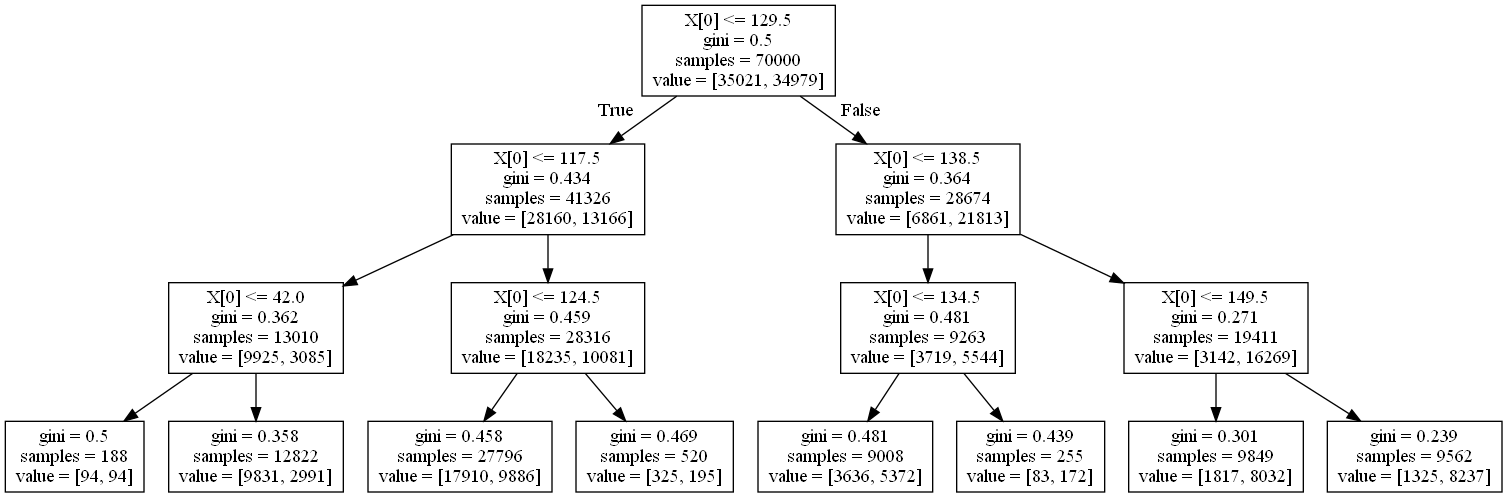

In [64]:

# Visualizing the tree.
from sklearn import tree
from graphviz import Source

dot_file = "ap_hi_tree_model.gv"
with open(dot_file, "w") as f:
    f = tree.export_graphviz(tree_model4, out_file=f)
    
s = Source.from_file(dot_file, format='png')
s.view()    
    
from IPython.display import Image
Image(filename=f'{dot_file}.png')     


In [65]:
df.gender.replace({1: "female", 2: "male"}, inplace=True)
df.cholesterol.replace({1: "normal", 2: "above normal", 3: "well above normal"}, inplace=True)
df.gluc.replace({1: "normal", 2: "above normal", 3: "well above normal"}, inplace=True)
df.smoke.replace({0: "doesn't smoke", 1: "smokes"}, inplace=True)
df.alco.replace({0: "doesn't drink", 1: "drinks"}, inplace=True)
df.active.replace({0: "not active", 1: "active"}, inplace=True)
df.cardio.replace({0: "absence", 1: "presence"}, inplace=True)
df.head(5)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_tree,height_tree,weight_tree,ap_lo_tree,ap_hi_tree
0,51.0,male,168,62.0,110,80,normal,normal,doesn't smoke,doesn't drink,active,absence,0.452588,0.493174,0.377572,0.425413,0.233271
1,56.0,female,156,85.0,140,90,well above normal,normal,doesn't smoke,doesn't drink,active,presence,0.568092,0.516693,0.579405,0.748377,0.815514
2,52.0,female,165,64.0,130,70,well above normal,normal,doesn't smoke,doesn't drink,not active,presence,0.452588,0.493174,0.473826,0.278570,0.596359
3,49.0,male,169,82.0,150,100,normal,normal,doesn't smoke,doesn't drink,active,presence,0.452588,0.493174,0.579405,0.836214,0.861431
4,48.0,female,156,56.0,100,60,normal,normal,doesn't smoke,doesn't drink,not active,absence,0.452588,0.516693,0.377572,0.278570,0.233271


In [66]:
df.drop('age', inplace=True, axis=1)
df.drop('height', inplace=True, axis=1)
df.drop('weight', inplace=True, axis=1)
df.drop('ap_hi', inplace=True, axis=1)
df.drop('ap_lo', inplace=True, axis=1)


In [68]:
df

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_tree,height_tree,weight_tree,ap_lo_tree,ap_hi_tree
0,male,normal,normal,doesn't smoke,doesn't drink,active,absence,0.452588,0.493174,0.377572,0.425413,0.233271
1,female,well above normal,normal,doesn't smoke,doesn't drink,active,presence,0.568092,0.516693,0.579405,0.748377,0.815514
2,female,well above normal,normal,doesn't smoke,doesn't drink,not active,presence,0.452588,0.493174,0.473826,0.278570,0.596359
3,male,normal,normal,doesn't smoke,doesn't drink,active,presence,0.452588,0.493174,0.579405,0.836214,0.861431
4,female,normal,normal,doesn't smoke,doesn't drink,not active,absence,0.452588,0.516693,0.377572,0.278570,0.233271
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,male,normal,normal,smokes,doesn't drink,active,absence,0.452588,0.493174,0.473826,0.425413,0.355663
69996,female,above normal,above normal,doesn't smoke,doesn't drink,active,presence,0.698142,0.493174,0.668862,0.748377,0.815514
69997,male,well above normal,normal,doesn't smoke,drinks,not active,presence,0.452588,0.512042,0.668862,0.748377,0.861431
69998,female,normal,above normal,doesn't smoke,doesn't drink,not active,presence,0.698142,0.493174,0.473826,0.425413,0.674510


In [69]:
# move column in pandas dataframe

df= df[[c for c in df if c not in ['cardio']] + ['cardio']]
df.head()

,gender,cholesterol,gluc,smoke,alco,active,age_tree,height_tree,weight_tree,ap_lo_tree,ap_hi_tree,cardio
0,male,normal,normal,doesn't smoke,doesn't drink,active,0.452588,0.493174,0.377572,0.425413,0.233271,absence
1,female,well above normal,normal,doesn't smoke,doesn't drink,active,0.568092,0.516693,0.579405,0.748377,0.815514,presence
2,female,well above normal,normal,doesn't smoke,doesn't drink,not active,0.452588,0.493174,0.473826,0.278570,0.596359,presence
3,male,normal,normal,doesn't smoke,doesn't drink,active,0.452588,0.493174,0.579405,0.836214,0.861431,presence
4,female,normal,normal,doesn't smoke,doesn't drink,not active,0.452588,0.516693,0.377572,0.278570,0.233271,absence


In [71]:
# Column labels.
# These are used only to print the tree.
header = list(df)
header

['gender',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'age_tree',
 'height_tree',
 'weight_tree',
 'ap_lo_tree',
 'ap_hi_tree',
 'cardio']

In [78]:
# select the wanted column
df_text_genre = df[list(df)]


In [79]:
training_data, testing_data = train_test_split(df_text_genre, test_size = 0.1, random_state=42)

In [80]:
print(training_data)

       gender        cholesterol          gluc          smoke           alco  \
42878    male  well above normal  above normal  doesn't smoke  doesn't drink   
5946     male             normal        normal  doesn't smoke  doesn't drink   
33058  female             normal        normal  doesn't smoke  doesn't drink   
34692  female             normal        normal  doesn't smoke  doesn't drink   
59232  female             normal        normal  doesn't smoke  doesn't drink   
...       ...                ...           ...            ...            ...   
37194    male             normal        normal         smokes  doesn't drink   
6265     male             normal        normal  doesn't smoke  doesn't drink   
54886  female             normal        normal  doesn't smoke  doesn't drink   
860    female             normal        normal  doesn't smoke  doesn't drink   
15795    male             normal        normal  doesn't smoke  doesn't drink   

           active  age_tree  height_tre

In [81]:
print(testing_data)

       gender        cholesterol          gluc          smoke           alco  \
46730  female       above normal        normal  doesn't smoke  doesn't drink   
48393  female             normal        normal  doesn't smoke  doesn't drink   
41416  female             normal        normal  doesn't smoke  doesn't drink   
34506  female             normal        normal  doesn't smoke  doesn't drink   
43725  female             normal        normal  doesn't smoke  doesn't drink   
...       ...                ...           ...            ...            ...   
23300    male       above normal        normal         smokes  doesn't drink   
55456  female  well above normal        normal  doesn't smoke  doesn't drink   
14951    male             normal  above normal  doesn't smoke  doesn't drink   
34450  female       above normal        normal  doesn't smoke  doesn't drink   
41050  female             normal        normal  doesn't smoke  doesn't drink   

       active  age_tree  height_tree  w

In [82]:
# Toy dataset.
# Format: each row is an example.
# The last column is the label.
# The first two columns are features.
# Feel free to play with it by adding more features & examples.
# Interesting note: I've written this so the 2nd and 5th examples
# have the same features, but different labels - so we can see how the
# tree handles this case.
training_data = training_data.values.tolist()
testing_data = testing_data.values.tolist()


In [83]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

In [84]:
for i in range (len(header)):
    print(f'unique values of {header[i]} = {len(unique_vals(training_data, i))}')

unique values of gender = 2
unique values of cholesterol = 3
unique values of gluc = 3
unique values of smoke = 2
unique values of alco = 2
unique values of active = 2
unique values of age_tree = 4
unique values of height_tree = 4
unique values of weight_tree = 4
unique values of ap_lo_tree = 4
unique values of ap_hi_tree = 8
unique values of cardio = 2


In [85]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [86]:
#######
# Demo:
class_counts(training_data)
#######

{'presence': 31481, 'absence': 31519}

In [87]:
def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

In [88]:
#######
# Demo:
is_numeric(7)
# is_numeric("Red")
#######

True

In [89]:
class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [90]:
#######
# Demo:
# Let's write a question for a numeric attribute
Question(1, 2)

Is cholesterol >= 2?

In [91]:
# How about one for a categorical attribute
q = Question(0, 'female')
q

Is gender == female?

In [92]:
# Let's pick an example from the training set ...
example = training_data[0]
# ... and see if it matches the question
q.match(example) # this will be false, since the first example is male .
#######

False

In [93]:
def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [94]:
#######
# Demo:
# Let's partition the training data based on whether rows are females.
true_rows, false_rows = partition(training_data, Question(0, 'female'))
# This will contain all the 'female' rows.
true_rows[:2]

[['female',
  'normal',
  'normal',
  "doesn't smoke",
  "doesn't drink",
  'active',
  0.5680915673907966,
  0.5358698143479257,
  0.47382630868456577,
  0.42541282615354625,
  0.5963587921847247,
  'absence'],
 ['female',
  'normal',
  'normal',
  "doesn't smoke",
  "doesn't drink",
  'active',
  0.698141943344502,
  0.5166927120329592,
  0.3775718663359113,
  0.42541282615354625,
  0.35566268527845735,
  'presence']]

In [95]:
# This will contain everything else.
false_rows[:2]
#######

[['male',
  'well above normal',
  'above normal',
  "doesn't smoke",
  "doesn't drink",
  'active',
  0.5680915673907966,
  0.49317419014217295,
  0.5794051254813438,
  0.8362142734896457,
  0.8614306630412047,
  'presence'],
 ['male',
  'normal',
  'normal',
  "doesn't smoke",
  "doesn't drink",
  'active',
  0.29750778816199375,
  0.49317419014217295,
  0.47382630868456577,
  0.42541282615354625,
  0.35566268527845735,
  'presence']]

In [96]:
def gini(rows):
    """Calculate the Gini Impurity for a list of rows.

    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

In [97]:
#######
# Demo:
# Let's look at some example to understand how Gini Impurity works.
#
# First, we'll look at a dataset with no mixing.
no_mixing = [['Apple'],
              ['Apple']]
# this will return 0
gini(no_mixing)

0.0

In [98]:
# Now, we'll look at dataset with a 50:50 apples:oranges ratio
some_mixing = [['Apple'],
               ['Orange']]
# this will return 0.5 - meaning, there's a 50% chance of misclassifying
# a random example we draw from the dataset.
gini(some_mixing)

0.5

In [99]:
# Now, we'll look at a dataset with many different labels
lots_of_mixing = [['Apple'],
                  ['Orange'],
                  ['Grape'],
                  ['Grapefruit'],
                  ['Blueberry']]
# This will return 0.8
gini(lots_of_mixing)
#######

0.7999999999999998

In [100]:
def info_gain(left, right, current_uncertainty):
    """Information Gain.

    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [101]:
#######
# Demo:
# Calculate the uncertainy of our training data.
current_uncertainty = gini(training_data)
current_uncertainty

0.4999998180901991

In [102]:
# How much information do we gain by partioning on  gender 'male'?
true_rows, false_rows = partition(training_data, Question(0, 'male'))
info_gain(true_rows, false_rows, current_uncertainty)

4.3572813324121995e-05

In [103]:
# How much information do we gain by partioning on  gluc 'normal'?
true_rows, false_rows = partition(training_data, Question(2, 'normal'))
info_gain(true_rows, false_rows, current_uncertainty)

0.00422005605564979

### It looks like we learned more using gluc 'normal' (0.004), than gender'male' (4.35e-5).  which seem consiestent with the graphs below (
- gluc 'normal' :: unmix the data well hence greater information gain.
- gender 'male' :: no much unmix of the data hence less information gain.

<AxesSubplot:xlabel='gluc'>

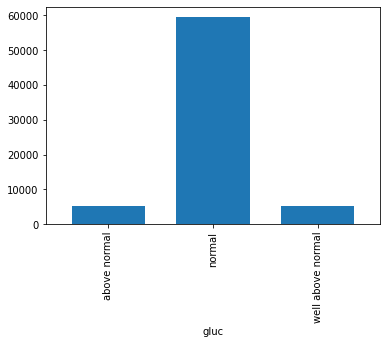

In [104]:
df.groupby(['gluc'])['cardio'].count().plot.bar(width= .7)

<AxesSubplot:xlabel='gender'>

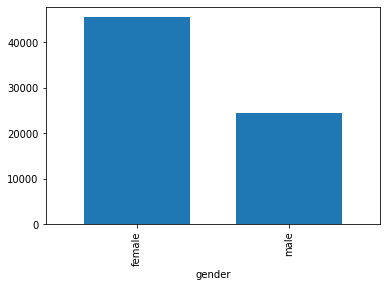

In [105]:
df.groupby(['gender'])['cardio'].count().plot.bar(width= .7)

In [106]:
def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [107]:
#######
# Demo:
# Find the best question to ask first for our toy dataset.
best_gain, best_question = find_best_split(training_data)
best_question
# FYI: is color == Red is just as good. See the note in the code above
# where I used '>='.
#######

Is ap_hi_tree >= 0.5963587921847247?

In [108]:
class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [109]:
class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [110]:
def build_tree(rows):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)

In [111]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [112]:
my_tree = build_tree(training_data)
# start 3:53  end 3:54  less than a minute

In [113]:
print_tree(my_tree)

Is ap_hi_tree >= 0.5963587921847247?
--> True:
  Is ap_hi_tree >= 0.8155142654076556?
  --> True:
    Is ap_hi_tree >= 0.8614306630412047?
    --> True:
      Is ap_lo_tree >= 0.42541282615354625?
      --> True:
        Is gluc == well above normal?
        --> True:
          Is smoke == doesn't smoke?
          --> True:
            Is gender == male?
            --> True:
              Is weight_tree >= 0.6688615930100038?
              --> True:
                Is ap_lo_tree >= 0.8362142734896457?
                --> True:
                  Is alco == drinks?
                  --> True:
                    Predict {'presence': 5}
                  --> False:
                    Is age_tree >= 0.698141943344502?
                    --> True:
                      Is height_tree >= 0.5120416966211359?
                      --> True:
                        Predict {'presence': 2, 'absence': 1}
                      --> False:
                        Is cholesterol == normal?
       

                            --> True:
                              Predict {'absence': 1}
                            --> False:
                              Is weight_tree >= 0.5794051254813438?
                              --> True:
                                Is age_tree >= 0.5680915673907966?
                                --> True:
                                  Is weight_tree >= 0.6688615930100038?
                                  --> True:
                                    Predict {'absence': 2, 'presence': 2}
                                  --> False:
                                    Predict {'presence': 1}
                                --> False:
                                  Predict {'presence': 4}
                              --> False:
                                Is weight_tree >= 0.47382630868456577?
                                --> True:
                                  Is age_tree >= 0.5680915673907966?
                                  

                        Is alco == drinks?
                        --> True:
                          Is age_tree >= 0.4525883261923158?
                          --> True:
                            Predict {'presence': 2}
                          --> False:
                            Predict {'absence': 1}
                        --> False:
                          Is age_tree >= 0.4525883261923158?
                          --> True:
                            Predict {'absence': 2}
                          --> False:
                            Predict {'presence': 2}
                      --> False:
                        Predict {'presence': 2}
                --> False:
                  Predict {'presence': 16}
              --> False:
                Is age_tree >= 0.5680915673907966?
                --> True:
                  Is ap_lo_tree >= 0.8362142734896457?
                  --> True:
                    Predict {'presence': 27}
                  --> False:
    

                                    --> False:
                                      Predict {'absence': 1}
                                  --> False:
                                    Predict {'absence': 1}
                          --> False:
                            Is ap_lo_tree >= 0.8362142734896457?
                            --> True:
                              Is age_tree >= 0.4525883261923158?
                              --> True:
                                Is weight_tree >= 0.6688615930100038?
                                --> True:
                                  Is height_tree >= 0.5358698143479257?
                                  --> True:
                                    Is active == active?
                                    --> True:
                                      Predict {'absence': 1}
                                    --> False:
                                      Predict {'presence': 1}
                                  --> Fals

                          --> True:
                            Is cholesterol == normal?
                            --> True:
                              Is age_tree >= 0.4525883261923158?
                              --> True:
                                Predict {'absence': 1, 'presence': 1}
                              --> False:
                                Predict {'presence': 2}
                            --> False:
                              Predict {'presence': 5}
                          --> False:
                            Predict {'presence': 8}
              --> False:
                Is alco == doesn't drink?
                --> True:
                  Is active == active?
                  --> True:
                    Is ap_lo_tree >= 0.7483770624830944?
                    --> True:
                      Is age_tree >= 0.5680915673907966?
                      --> True:
                        Is age_tree >= 0.698141943344502?
                        

                            Predict {'presence': 1}
                        --> False:
                          Predict {'absence': 1}
                  --> False:
                    Predict {'presence': 7}
                --> False:
                  Is alco == drinks?
                  --> True:
                    Is weight_tree >= 0.5794051254813438?
                    --> True:
                      Is weight_tree >= 0.6688615930100038?
                      --> True:
                        Is gluc == normal?
                        --> True:
                          Predict {'presence': 9}
                        --> False:
                          Is age_tree >= 0.4525883261923158?
                          --> True:
                            Predict {'presence': 1, 'absence': 1}
                          --> False:
                            Predict {'presence': 1}
                      --> False:
                        Is ap_lo_tree >= 0.8362142734896457?
           

                              --> True:
                                Is weight_tree >= 0.5794051254813438?
                                --> True:
                                  Predict {'absence': 1}
                                --> False:
                                  Predict {'presence': 2, 'absence': 2}
                              --> False:
                                Predict {'presence': 2, 'absence': 1}
                          --> False:
                            Is gluc == normal?
                            --> True:
                              Is alco == doesn't drink?
                              --> True:
                                Is gender == female?
                                --> True:
                                  Predict {'presence': 112, 'absence': 32}
                                --> False:
                                  Is weight_tree >= 0.5794051254813438?
                                  --> True:
                  

                                    Predict {'presence': 7, 'absence': 1}
                                --> False:
                                  Is gender == male?
                                  --> True:
                                    Predict {'presence': 14}
                                  --> False:
                                    Predict {'presence': 18, 'absence': 1}
                              --> False:
                                Is gluc == normal?
                                --> True:
                                  Predict {'presence': 4, 'absence': 1}
                                --> False:
                                  Predict {'presence': 1}
                    --> False:
                      Is age_tree >= 0.4525883261923158?
                      --> True:
                        Is smoke == doesn't smoke?
                        --> True:
                          Is gluc == normal?
                          --> True:
            

                                      Predict {'presence': 1, 'absence': 1}
                            --> False:
                              Is weight_tree >= 0.6688615930100038?
                              --> True:
                                Is gender == female?
                                --> True:
                                  Is age_tree >= 0.5680915673907966?
                                  --> True:
                                    Predict {'presence': 1}
                                  --> False:
                                    Predict {'presence': 4, 'absence': 1}
                                --> False:
                                  Is age_tree >= 0.5680915673907966?
                                  --> True:
                                    Predict {'absence': 2, 'presence': 1}
                                  --> False:
                                    Predict {'presence': 2, 'absence': 1}
                              --> False:


                                  Predict {'presence': 8, 'absence': 1}
                                --> False:
                                  Predict {'presence': 4}
                              --> False:
                                Predict {'presence': 10}
                            --> False:
                              Is weight_tree >= 0.47382630868456577?
                              --> True:
                                Is ap_lo_tree >= 0.7483770624830944?
                                --> True:
                                  Is cholesterol == well above normal?
                                  --> True:
                                    Is gender == female?
                                    --> True:
                                      Predict {'absence': 1, 'presence': 1}
                                    --> False:
                                      Predict {'presence': 1}
                                  --> False:
                      

                            --> True:
                              Is active == active?
                              --> True:
                                Is alco == drinks?
                                --> True:
                                  Predict {'presence': 1}
                                --> False:
                                  Predict {'presence': 7, 'absence': 2}
                              --> False:
                                Predict {'presence': 1}
                            --> False:
                              Predict {'presence': 2}
                          --> False:
                            Predict {'presence': 2}
                  --> False:
                    Is weight_tree >= 0.47382630868456577?
                    --> True:
                      Is weight_tree >= 0.5794051254813438?
                      --> True:
                        Is alco == drinks?
                        --> True:
                          Is ap_lo_tree

                            Is weight_tree >= 0.5794051254813438?
                            --> True:
                              Is smoke == doesn't smoke?
                              --> True:
                                Is height_tree >= 0.5120416966211359?
                                --> True:
                                  Is weight_tree >= 0.6688615930100038?
                                  --> True:
                                    Predict {'absence': 2, 'presence': 6}
                                  --> False:
                                    Predict {'presence': 7, 'absence': 2}
                                --> False:
                                  Is weight_tree >= 0.6688615930100038?
                                  --> True:
                                    Predict {'presence': 12, 'absence': 2}
                                  --> False:
                                    Predict {'absence': 5, 'presence': 21}
                        

                      Is age_tree >= 0.4525883261923158?
                      --> True:
                        Is gender == female?
                        --> True:
                          Is height_tree >= 0.5120416966211359?
                          --> True:
                            Predict {'presence': 1, 'absence': 1}
                          --> False:
                            Is weight_tree >= 0.6688615930100038?
                            --> True:
                              Is smoke == doesn't smoke?
                              --> True:
                                Predict {'presence': 11, 'absence': 2}
                              --> False:
                                Predict {'presence': 1}
                            --> False:
                              Is weight_tree >= 0.47382630868456577?
                              --> True:
                                Is weight_tree >= 0.5794051254813438?
                                --> True:


                                          Predict {'presence': 6, 'absence': 1}
                                      --> False:
                                        Is weight_tree >= 0.6688615930100038?
                                        --> True:
                                          Predict {'presence': 4}
                                        --> False:
                                          Predict {'presence': 1, 'absence': 1}
                                  --> False:
                                    Is age_tree >= 0.4525883261923158?
                                    --> True:
                                      Is age_tree >= 0.5680915673907966?
                                      --> True:
                                        Predict {'presence': 16, 'absence': 2}
                                      --> False:
                                        Predict {'presence': 32, 'absence': 3}
                                    --> False:
         

                                    Predict {'absence': 1, 'presence': 1}
                              --> False:
                                Is gluc == normal?
                                --> True:
                                  Is weight_tree >= 0.6688615930100038?
                                  --> True:
                                    Is ap_lo_tree >= 0.42541282615354625?
                                    --> True:
                                      Predict {'absence': 5, 'presence': 15}
                                    --> False:
                                      Predict {'presence': 3}
                                  --> False:
                                    Is ap_lo_tree >= 0.42541282615354625?
                                    --> True:
                                      Predict {'presence': 30, 'absence': 12}
                                    --> False:
                                      Predict {'absence': 2, 'presence': 3}
    

                                      Is weight_tree >= 0.47382630868456577?
                                      --> True:
                                        Predict {'presence': 9, 'absence': 1}
                                      --> False:
                                        Predict {'absence': 1, 'presence': 1}
                                    --> False:
                                      Is weight_tree >= 0.47382630868456577?
                                      --> True:
                                        Predict {'presence': 6, 'absence': 1}
                                      --> False:
                                        Predict {'presence': 4}
                        --> False:
                          Is weight_tree >= 0.5794051254813438?
                          --> True:
                            Is weight_tree >= 0.6688615930100038?
                            --> True:
                              Predict {'presence': 8}
              

                              Is ap_lo_tree >= 0.7483770624830944?
                              --> True:
                                Predict {'presence': 17}
                              --> False:
                                Is height_tree >= 0.5166927120329592?
                                --> True:
                                  Predict {'presence': 1}
                                --> False:
                                  Is alco == doesn't drink?
                                  --> True:
                                    Predict {'absence': 1, 'presence': 1}
                                  --> False:
                                    Predict {'presence': 1}
                          --> False:
                            Is ap_lo_tree >= 0.7483770624830944?
                            --> True:
                              Is gender == male?
                              --> True:
                                Is height_tree >= 0.5166927120329592?


                                    Predict {'presence': 1, 'absence': 1}
                                --> False:
                                  Predict {'presence': 2}
                              --> False:
                                Is weight_tree >= 0.5794051254813438?
                                --> True:
                                  Is ap_lo_tree >= 0.8362142734896457?
                                  --> True:
                                    Predict {'presence': 1}
                                  --> False:
                                    Predict {'absence': 3}
                                --> False:
                                  Is ap_lo_tree >= 0.8362142734896457?
                                  --> True:
                                    Predict {'absence': 1}
                                  --> False:
                                    Predict {'presence': 3}
                            --> False:
                              Is

              Is height_tree >= 0.5358698143479257?
              --> True:
                Predict {'absence': 4}
              --> False:
                Is age_tree >= 0.698141943344502?
                --> True:
                  Predict {'presence': 2}
                --> False:
                  Is ap_lo_tree >= 0.42541282615354625?
                  --> True:
                    Predict {'absence': 1}
                  --> False:
                    Predict {'presence': 1}
            --> False:
              Predict {'presence': 6}
          --> False:
            Is age_tree >= 0.4525883261923158?
            --> True:
              Is height_tree >= 0.5358698143479257?
              --> True:
                Is weight_tree >= 0.5794051254813438?
                --> True:
                  Is age_tree >= 0.698141943344502?
                  --> True:
                    Predict {'presence': 5}
                  --> False:
                    Predict {'absence': 1}
            

                            --> False:
                              Predict {'absence': 1}
                        --> False:
                          Is weight_tree >= 0.6688615930100038?
                          --> True:
                            Predict {'presence': 2}
                          --> False:
                            Is ap_lo_tree >= 0.8362142734896457?
                            --> True:
                              Predict {'presence': 1}
                            --> False:
                              Is gluc == normal?
                              --> True:
                                Predict {'absence': 1, 'presence': 2}
                              --> False:
                                Predict {'presence': 1}
                  --> False:
                    Is weight_tree >= 0.6688615930100038?
                    --> True:
                      Predict {'presence': 8}
                    --> False:
                      Is gluc == norma

                              Predict {'presence': 4}
                    --> False:
                      Is gender == male?
                      --> True:
                        Is weight_tree >= 0.6688615930100038?
                        --> True:
                          Is height_tree >= 0.5120416966211359?
                          --> True:
                            Predict {'presence': 7}
                          --> False:
                            Is ap_lo_tree >= 0.42541282615354625?
                            --> True:
                              Predict {'presence': 1, 'absence': 1}
                            --> False:
                              Predict {'presence': 1}
                        --> False:
                          Is age_tree >= 0.4525883261923158?
                          --> True:
                            Is ap_lo_tree >= 0.42541282615354625?
                            --> True:
                              Is height_tree >= 0.512041

                          --> True:
                            Is active == active?
                            --> True:
                              Is gluc == normal?
                              --> True:
                                Is weight_tree >= 0.6688615930100038?
                                --> True:
                                  Is height_tree >= 0.5358698143479257?
                                  --> True:
                                    Predict {'absence': 2}
                                  --> False:
                                    Is ap_lo_tree >= 0.7483770624830944?
                                    --> True:
                                      Predict {'absence': 1}
                                    --> False:
                                      Predict {'presence': 2, 'absence': 1}
                                --> False:
                                  Is height_tree >= 0.5358698143479257?
                                  --> 

                                  Predict {'absence': 2, 'presence': 2}
                              --> False:
                                Predict {'absence': 1}
                --> False:
                  Is weight_tree >= 0.5794051254813438?
                  --> True:
                    Is ap_lo_tree >= 0.8362142734896457?
                    --> True:
                      Predict {'presence': 1}
                    --> False:
                      Is gluc == well above normal?
                      --> True:
                        Predict {'absence': 1}
                      --> False:
                        Is weight_tree >= 0.6688615930100038?
                        --> True:
                          Is height_tree >= 0.5120416966211359?
                          --> True:
                            Predict {'presence': 1}
                          --> False:
                            Predict {'absence': 1}
                        --> False:
                      

                                      Predict {'presence': 1}
                                  --> False:
                                    Predict {'absence': 1}
                        --> False:
                          Predict {'absence': 2}
                  --> False:
                    Is height_tree >= 0.5358698143479257?
                    --> True:
                      Predict {'absence': 1}
                    --> False:
                      Is gender == female?
                      --> True:
                        Is weight_tree >= 0.47382630868456577?
                        --> True:
                          Is ap_hi_tree >= 0.6745098039215687?
                          --> True:
                            Predict {'presence': 1}
                          --> False:
                            Is age_tree >= 0.4525883261923158?
                            --> True:
                              Is age_tree >= 0.5680915673907966?
                              -

                              --> False:
                                Predict {'absence': 1}
                            --> False:
                              Is age_tree >= 0.4525883261923158?
                              --> True:
                                Predict {'presence': 2, 'absence': 1}
                              --> False:
                                Is ap_lo_tree >= 0.8362142734896457?
                                --> True:
                                  Predict {'presence': 1}
                                --> False:
                                  Predict {'presence': 4, 'absence': 1}
                          --> False:
                            Predict {'presence': 4}
                    --> False:
                      Is height_tree >= 0.5358698143479257?
                      --> True:
                        Is age_tree >= 0.4525883261923158?
                        --> True:
                          Predict {'absence': 4}
           

                Predict {'presence': 8}
            --> False:
              Is age_tree >= 0.4525883261923158?
              --> True:
                Is weight_tree >= 0.5794051254813438?
                --> True:
                  Is alco == drinks?
                  --> True:
                    Is ap_hi_tree >= 0.6745098039215687?
                    --> True:
                      Predict {'absence': 1}
                    --> False:
                      Is weight_tree >= 0.6688615930100038?
                      --> True:
                        Is gender == female?
                        --> True:
                          Predict {'absence': 1}
                        --> False:
                          Is gluc == above normal?
                          --> True:
                            Is age_tree >= 0.5680915673907966?
                            --> True:
                              Predict {'presence': 2}
                            --> False:
                    

                        --> False:
                          Is gluc == normal?
                          --> True:
                            Predict {'presence': 6, 'absence': 4}
                          --> False:
                            Predict {'absence': 4, 'presence': 4}
                    --> False:
                      Is gluc == normal?
                      --> True:
                        Is height_tree >= 0.5166927120329592?
                        --> True:
                          Predict {'absence': 1}
                        --> False:
                          Is active == active?
                          --> True:
                            Predict {'presence': 4, 'absence': 2}
                          --> False:
                            Predict {'presence': 2, 'absence': 1}
                      --> False:
                        Predict {'presence': 1}
                  --> False:
                    Is weight_tree >= 0.5794051254813438?
           

                                Predict {'presence': 1}
                              --> False:
                                Predict {'presence': 2, 'absence': 1}
                            --> False:
                              Predict {'presence': 2}
                      --> False:
                        Is height_tree >= 0.5358698143479257?
                        --> True:
                          Is weight_tree >= 0.5794051254813438?
                          --> True:
                            Predict {'presence': 4}
                          --> False:
                            Is weight_tree >= 0.47382630868456577?
                            --> True:
                              Predict {'absence': 2}
                            --> False:
                              Predict {'presence': 2}
                        --> False:
                          Is age_tree >= 0.4525883261923158?
                          --> True:
                            Is ap_hi_tr

                                    --> False:
                                      Predict {'absence': 1}
                                  --> False:
                                    Is weight_tree >= 0.47382630868456577?
                                    --> True:
                                      Predict {'presence': 6, 'absence': 7}
                                    --> False:
                                      Predict {'presence': 2, 'absence': 1}
                                --> False:
                                  Is active == active?
                                  --> True:
                                    Predict {'presence': 4, 'absence': 2}
                                  --> False:
                                    Predict {'presence': 2}
                              --> False:
                                Is weight_tree >= 0.47382630868456577?
                                --> True:
                                  Is age_tree >= 0.4

                                Predict {'absence': 1}
                      --> False:
                        Is age_tree >= 0.5680915673907966?
                        --> True:
                          Is ap_hi_tree >= 0.6745098039215687?
                          --> True:
                            Predict {'absence': 1}
                          --> False:
                            Is ap_lo_tree >= 0.42541282615354625?
                            --> True:
                              Is active == active?
                              --> True:
                                Is weight_tree >= 0.47382630868456577?
                                --> True:
                                  Is gender == male?
                                  --> True:
                                    Is cholesterol == normal?
                                    --> True:
                                      Is gluc == well above normal?
                                      --> True:
   

                        Predict {'presence': 1}
                      --> False:
                        Is gluc == normal?
                        --> True:
                          Predict {'presence': 1}
                        --> False:
                          Predict {'absence': 1, 'presence': 2}
                    --> False:
                      Predict {'absence': 1}
                  --> False:
                    Is ap_lo_tree >= 0.42541282615354625?
                    --> True:
                      Is smoke == doesn't smoke?
                      --> True:
                        Predict {'absence': 5}
                      --> False:
                        Predict {'presence': 1, 'absence': 1}
                    --> False:
                      Predict {'presence': 1}
                --> False:
                  Predict {'presence': 4}
        --> False:
          Is active == active?
          --> True:
            Is alco == doesn't drink?
            --> True:
 

                            Predict {'presence': 1}
                      --> False:
                        Is alco == drinks?
                        --> True:
                          Predict {'absence': 1}
                        --> False:
                          Predict {'presence': 1, 'absence': 2}
                    --> False:
                      Is weight_tree >= 0.47382630868456577?
                      --> True:
                        Predict {'absence': 3}
                      --> False:
                        Predict {'presence': 1}
            --> False:
              Is alco == drinks?
              --> True:
                Is ap_hi_tree >= 0.35566268527845735?
                --> True:
                  Is ap_lo_tree >= 0.42541282615354625?
                  --> True:
                    Predict {'absence': 2, 'presence': 1}
                  --> False:
                    Predict {'absence': 1}
                --> False:
                  Is ap_lo_tree >= 0.

                            --> False:
                              Is gluc == normal?
                              --> True:
                                Is ap_hi_tree >= 0.375?
                                --> True:
                                  Is ap_lo_tree >= 0.42541282615354625?
                                  --> True:
                                    Is weight_tree >= 0.5794051254813438?
                                    --> True:
                                      Predict {'absence': 1}
                                    --> False:
                                      Predict {'absence': 1, 'presence': 1}
                                  --> False:
                                    Predict {'absence': 1}
                                --> False:
                                  Is ap_lo_tree >= 0.42541282615354625?
                                  --> True:
                                    Is ap_lo_tree >= 0.7483770624830944?
                  

                              Predict {'presence': 1}
                            --> False:
                              Predict {'absence': 1, 'presence': 2}
                          --> False:
                            Predict {'absence': 1}
                    --> False:
                      Is height_tree >= 0.5166927120329592?
                      --> True:
                        Is height_tree >= 0.5358698143479257?
                        --> True:
                          Predict {'presence': 2}
                        --> False:
                          Predict {'absence': 1}
                      --> False:
                        Predict {'presence': 4}
                  --> False:
                    Is ap_hi_tree >= 0.375?
                    --> True:
                      Predict {'presence': 2}
                    --> False:
                      Is weight_tree >= 0.47382630868456577?
                      --> True:
                        Is ap_lo_tree >= 0.7

                        Predict {'presence': 1}
                      --> False:
                        Is smoke == doesn't smoke?
                        --> True:
                          Is ap_lo_tree >= 0.42541282615354625?
                          --> True:
                            Is ap_lo_tree >= 0.7483770624830944?
                            --> True:
                              Predict {'absence': 1}
                            --> False:
                              Is weight_tree >= 0.5794051254813438?
                              --> True:
                                Predict {'absence': 1}
                              --> False:
                                Predict {'absence': 2, 'presence': 2}
                          --> False:
                            Predict {'absence': 1}
                        --> False:
                          Is weight_tree >= 0.5794051254813438?
                          --> True:
                            Predict {'abse

                                      --> False:
                                        Predict {'presence': 1}
                                --> False:
                                  Is height_tree >= 0.5166927120329592?
                                  --> True:
                                    Is ap_hi_tree >= 0.375?
                                    --> True:
                                      Predict {'absence': 1}
                                    --> False:
                                      Is gluc == normal?
                                      --> True:
                                        Is cholesterol == normal?
                                        --> True:
                                          Predict {'absence': 28, 'presence': 22}
                                        --> False:
                                          Predict {'absence': 4, 'presence': 5}
                                      --> False:
                               

                                Predict {'absence': 2}
                              --> False:
                                Is gluc == normal?
                                --> True:
                                  Is height_tree >= 0.5120416966211359?
                                  --> True:
                                    Is alco == drinks?
                                    --> True:
                                      Predict {'absence': 5}
                                    --> False:
                                      Predict {'presence': 4, 'absence': 7}
                                  --> False:
                                    Is ap_lo_tree >= 0.42541282615354625?
                                    --> True:
                                      Is alco == drinks?
                                      --> True:
                                        Predict {'absence': 17, 'presence': 9}
                                      --> False:
            

                                Predict {'absence': 2, 'presence': 2}
                            --> False:
                              Predict {'absence': 1}
                          --> False:
                            Is smoke == doesn't smoke?
                            --> True:
                              Is gluc == above normal?
                              --> True:
                                Is height_tree >= 0.5166927120329592?
                                --> True:
                                  Predict {'presence': 2, 'absence': 2}
                                --> False:
                                  Predict {'absence': 5, 'presence': 2}
                              --> False:
                                Is gluc == normal?
                                --> True:
                                  Is height_tree >= 0.5358698143479257?
                                  --> True:
                                    Predict {'absence': 5, 'pres

                                  Predict {'presence': 4, 'absence': 3}
                                --> False:
                                  Is height_tree >= 0.5120416966211359?
                                  --> True:
                                    Predict {'presence': 1, 'absence': 1}
                                  --> False:
                                    Predict {'presence': 36, 'absence': 38}
                              --> False:
                                Is height_tree >= 0.5166927120329592?
                                --> True:
                                  Predict {'absence': 1}
                                --> False:
                                  Predict {'presence': 6, 'absence': 7}
                            --> False:
                              Is age_tree >= 0.4525883261923158?
                              --> True:
                                Predict {'absence': 3, 'presence': 2}
                              --> F

                Is alco == drinks?
                --> True:
                  Is ap_hi_tree >= 0.35566268527845735?
                  --> True:
                    Predict {'absence': 1}
                  --> False:
                    Predict {'presence': 1}
                --> False:
                  Is weight_tree >= 0.6688615930100038?
                  --> True:
                    Is ap_hi_tree >= 0.35566268527845735?
                    --> True:
                      Predict {'absence': 1}
                    --> False:
                      Is height_tree >= 0.5120416966211359?
                      --> True:
                        Predict {'absence': 1}
                      --> False:
                        Predict {'presence': 3}
                  --> False:
                    Is weight_tree >= 0.5794051254813438?
                    --> True:
                      Is height_tree >= 0.5166927120329592?
                      --> True:
                        Is ap_hi_tr

                                  Predict {'presence': 1}
                              --> False:
                                Predict {'presence': 1}
                          --> False:
                            Is gluc == well above normal?
                            --> True:
                              Predict {'presence': 1}
                            --> False:
                              Is height_tree >= 0.5120416966211359?
                              --> True:
                                Is gluc == normal?
                                --> True:
                                  Predict {'absence': 2}
                                --> False:
                                  Predict {'presence': 1, 'absence': 2}
                              --> False:
                                Is gluc == normal?
                                --> True:
                                  Is ap_lo_tree >= 0.42541282615354625?
                                  --> Tr

                                      Is height_tree >= 0.5120416966211359?
                                      --> True:
                                        Predict {'presence': 1, 'absence': 1}
                                      --> False:
                                        Predict {'absence': 10, 'presence': 6}
                                    --> False:
                                      Is height_tree >= 0.5120416966211359?
                                      --> True:
                                        Predict {'absence': 4, 'presence': 1}
                                      --> False:
                                        Predict {'absence': 20, 'presence': 7}
                                  --> False:
                                    Predict {'presence': 1}
                                --> False:
                                  Is gluc == normal?
                                  --> True:
                                    Is height_tr

                                        Predict {'absence': 10, 'presence': 12}
                                      --> False:
                                        Predict {'absence': 3, 'presence': 1}
                          --> False:
                            Is smoke == doesn't smoke?
                            --> True:
                              Is gender == female?
                              --> True:
                                Predict {'presence': 1}
                              --> False:
                                Predict {'absence': 1}
                            --> False:
                              Predict {'absence': 4}
                        --> False:
                          Is height_tree >= 0.5120416966211359?
                          --> True:
                            Predict {'presence': 1, 'absence': 1}
                          --> False:
                            Predict {'presence': 2}
                      --> False:
     

                              Predict {'absence': 18, 'presence': 4}
                            --> False:
                              Predict {'absence': 1}
        --> False:
          Is weight_tree >= 0.47382630868456577?
          --> True:
            Is ap_lo_tree >= 0.8362142734896457?
            --> True:
              Is gender == female?
              --> True:
                Is height_tree >= 0.5166927120329592?
                --> True:
                  Is height_tree >= 0.5358698143479257?
                  --> True:
                    Is active == active?
                    --> True:
                      Predict {'absence': 1, 'presence': 1}
                    --> False:
                      Predict {'presence': 1}
                  --> False:
                    Predict {'absence': 1}
                --> False:
                  Is active == active?
                  --> True:
                    Predict {'presence': 9}
                  --> False:
          

                            --> True:
                              Is gluc == normal?
                              --> True:
                                Predict {'presence': 6, 'absence': 14}
                              --> False:
                                Predict {'absence': 3, 'presence': 1}
                            --> False:
                              Is gluc == normal?
                              --> True:
                                Predict {'absence': 2, 'presence': 1}
                              --> False:
                                Predict {'absence': 1, 'presence': 1}
              --> False:
                Is weight_tree >= 0.5794051254813438?
                --> True:
                  Is gender == female?
                  --> True:
                    Is height_tree >= 0.5166927120329592?
                    --> True:
                      Is gluc == well above normal?
                      --> True:
                        Is height_tree

                    --> False:
                      Is alco == drinks?
                      --> True:
                        Predict {'absence': 5}
                      --> False:
                        Is smoke == doesn't smoke?
                        --> True:
                          Is gender == female?
                          --> True:
                            Is height_tree >= 0.5358698143479257?
                            --> True:
                              Is gluc == well above normal?
                              --> True:
                                Predict {'absence': 3}
                              --> False:
                                Is ap_lo_tree >= 0.42541282615354625?
                                --> True:
                                  Predict {'absence': 1}
                                --> False:
                                  Is active == active?
                                  --> True:
                                    P

                  --> False:
                    Is smoke == smokes?
                    --> True:
                      Is weight_tree >= 0.47382630868456577?
                      --> True:
                        Is ap_lo_tree >= 0.42541282615354625?
                        --> True:
                          Is alco == doesn't drink?
                          --> True:
                            Predict {'absence': 1, 'presence': 1}
                          --> False:
                            Predict {'presence': 1}
                        --> False:
                          Predict {'absence': 1}
                      --> False:
                        Predict {'absence': 2}
                    --> False:
                      Is ap_hi_tree >= 0.375?
                      --> True:
                        Predict {'absence': 1}
                      --> False:
                        Is active == not active?
                        --> True:
                          Is ap_l

                      --> True:
                        Is ap_lo_tree >= 0.42541282615354625?
                        --> True:
                          Is weight_tree >= 0.5794051254813438?
                          --> True:
                            Is gender == male?
                            --> True:
                              Is weight_tree >= 0.6688615930100038?
                              --> True:
                                Predict {'presence': 1}
                              --> False:
                                Predict {'absence': 1}
                            --> False:
                              Predict {'presence': 1}
                          --> False:
                            Predict {'presence': 4}
                        --> False:
                          Predict {'absence': 2}
                      --> False:
                        Is weight_tree >= 0.5794051254813438?
                        --> True:
                          Is gen

                    Is gluc == well above normal?
                    --> True:
                      Predict {'absence': 8}
                    --> False:
                      Is weight_tree >= 0.5794051254813438?
                      --> True:
                        Predict {'absence': 3}
                      --> False:
                        Is height_tree >= 0.5166927120329592?
                        --> True:
                          Predict {'absence': 1}
                        --> False:
                          Predict {'absence': 4, 'presence': 1}
                  --> False:
                    Is height_tree >= 0.5166927120329592?
                    --> True:
                      Is weight_tree >= 0.6688615930100038?
                      --> True:
                        Predict {'absence': 3}
                      --> False:
                        Is weight_tree >= 0.5794051254813438?
                        --> True:
                          Predict {'presenc

                                --> False:
                                  Is smoke == doesn't smoke?
                                  --> True:
                                    Predict {'absence': 1, 'presence': 1}
                                  --> False:
                                    Predict {'presence': 1, 'absence': 2}
                              --> False:
                                Predict {'absence': 2}
                            --> False:
                              Predict {'presence': 2}
                --> False:
                  Is weight_tree >= 0.47382630868456577?
                  --> True:
                    Is height_tree >= 0.5120416966211359?
                    --> True:
                      Predict {'absence': 3}
                    --> False:
                      Is gluc == normal?
                      --> True:
                        Is smoke == doesn't smoke?
                        --> True:
                          Is ap_lo_t

In [114]:
def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [119]:
#######
# Demo:
# The tree predicts the 1st row of our
# training data is an apple with confidence 1.

# classify(training_data[0], my_tree)

classify(training_data[1], my_tree)
#######

{'presence': 59, 'absence': 296}

In [116]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [117]:
#######
# Demo:
# Printing that a bit nicer
print_leaf(classify(training_data[0], my_tree))
#######

{'presence': '100%'}

In [118]:
#######
# Demo:
# On the second example, the confidence is lower
print_leaf(classify(training_data[1], my_tree))
#######

{'presence': '16%', 'absence': '83%'}

In [122]:
for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))

Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '89%', 'absence': '10%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '62%', 'presence': '37%'}
Actual: absence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: absence. Predicted: {'absence': '79%', 'presence': '20%'}
Actual: absence. Predicted: {'presence': '15%', 'absence': '84%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'presence': '80%', 'absence': '20%'}
Actual: absence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: presence. Predicted: {'presence': '33%', 'absence': '66%'}
Actual: absence. Predicted: {'presence': '11%', 'absence': '88%'}
Actual: presence. Predicted: {'presence': '82%', 'absence': '17%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '80%', 'absence': '20%'}
Actual: absence. Pr

Actual: absence. Predicted: {'absence': '50%', 'presence': '50%'}
Actual: presence. Predicted: {'absence': '16%', 'presence': '83%'}
Actual: presence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'absence': '74%', 'presence': '25%'}
Actual: presence. Predicted: {'absence': '88%', 'presence': '11%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '86%', 'absence': '13%'}
Actual: absence. Predicted: {'absence': '67%', 'presence': '32%'}
Actual: absence. Predicted: {'absence': '59%', 'presence': '40%'}
Actual: presence. Predicted: {'presence': '19%', 'absence': '80%'}
Actual: absence. Predicted: {'absence': '33%', 'presence': '66%'}
Actual: absence. Predicted: {'absence': '85%', 'presence': '14%'}
Actual: presence. Predicted: {'absence': '33%', 'presence': '66%'}
Actual: absence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: absence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: presence. Predicted: {'absence

Actual: presence. Predicted: {'presence': '90%', 'absence': '10%'}
Actual: presence. Predicted: {'absence': '76%', 'presence': '23%'}
Actual: absence. Predicted: {'absence': '91%', 'presence': '8%'}
Actual: presence. Predicted: {'absence': '30%', 'presence': '70%'}
Actual: presence. Predicted: {'presence': '51%', 'absence': '48%'}
Actual: presence. Predicted: {'presence': '62%', 'absence': '37%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: absence. Predicted: {'absence': '91%', 'presence': '8%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '66%', 'absence': '33%'}
Actual: presence. Predicted: {'presence': '88%', 'absence': '11%'}
Actual: presence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: absence. Predicted: {'absence': '18%', 'presence': '81%'}
Actual: absence. Predicted: {'presence': '51%', 'abse

Actual: presence. Predicted: {'presence': '62%', 'absence': '37%'}
Actual: presence. Predicted: {'absence': '35%', 'presence': '65%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '83%', 'presence': '16%'}
Actual: absence. Predicted: {'absence': '69%', 'presence': '30%'}
Actual: absence. Predicted: {'absence': '93%', 'presence': '6%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: absence. Predicted: {'absence': '80%', 'presence': '19%'}
Actual: presence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '69%', 'presence': '30%'}
Actual: absence. Predicted: {'presence': '16%', 'absence': '83%'}
Actual: absence. Predicted: {'absence': '92%', 'presence': '7%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '78%', 'absence': '21%'}
Actual: absence. Predicted: {'absence': '7

Actual: absence. Predicted: {'presence': '38%', 'absence': '61%'}
Actual: absence. Predicted: {'presence': '31%', 'absence': '68%'}
Actual: presence. Predicted: {'absence': '44%', 'presence': '55%'}
Actual: absence. Predicted: {'absence': '95%', 'presence': '4%'}
Actual: presence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'absence': '52%', 'presence': '47%'}
Actual: absence. Predicted: {'absence': '60%', 'presence': '39%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: absence. Predicted: {'presence': '33%', 'absence': '66%'}
Actual: presence. Predicted: {'presence': '19%', 'absence': '80%'}
Actual: absence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '66%', 'presence': '33%'}
Actual: presence. Predicted: {'presence': '80%', 'absence': '19%'}
Actual: absence. Predicted: {'absence': '82%', 'presence': '17%'}
Actual: absence. Predicted: {'absence': '80%', 'presence':

Actual: presence. Predicted: {'presence': '75%', 'absence': '25%'}
Actual: presence. Predicted: {'absence': '55%', 'presence': '44%'}
Actual: absence. Predicted: {'presence': '46%', 'absence': '53%'}
Actual: absence. Predicted: {'presence': '86%', 'absence': '13%'}
Actual: absence. Predicted: {'absence': '88%', 'presence': '11%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '50%', 'presence': '50%'}
Actual: presence. Predicted: {'presence': '66%', 'absence': '33%'}
Actual: absence. Predicted: {'presence': '19%', 'absence': '80%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '64%', 'presence': '35%'}
Actual: presence. Predicted: {'absence': '74%', 'presence': '25%'}
Actual: presence. Predicted: {'absence': '66%', 'presence': '33%'}
Actual: absence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: presence. Predicted: {'absence': '45%', 'prese

Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '50%', 'presence': '50%'}
Actual: absence. Predicted: {'absence': '79%', 'presence': '20%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'presence': '15%', 'absence': '84%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'presence': '46%', 'absence': '53%'}
Actual: absence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: absence. Predicted: {'presence': '46%', 'absence': '53%'}
Actual: presence. Predicted: {'absence': '42%', 'presence': '57%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '50%', 'presence': '50%'}
Actual: absence. Predicted: {'absence': '69%', 'presence': '30%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '60%', 'presence': '40%'}
Actual: absence. Predicted: {'presence'

Actual: absence. Predicted: {'presence': '36%', 'absence': '63%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '94%', 'presence': '5%'}
Actual: absence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: absence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '15%', 'absence': '84%'}
Actual: presence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '89%', 'presence': '10%'}
Actual: absence. Predicted: {'presence': '25%', 'absence': '75%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'presence': '30%', 'absence': '69%'}
Actual: absence. Predicted: {'absence': '78%', 'presence': '21%'}
Actual: absence. Predicted: {'presence': '46%', 'absence': '53%'}
Actual: presence. Predicted: {'absence': '28%', 'presence': '71%'}
Actua

Actual: absence. Predicted: {'presence': '26%', 'absence': '73%'}
Actual: absence. Predicted: {'presence': '40%', 'absence': '60%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: absence. Predicted: {'absence': '94%', 'presence': '5%'}
Actual: absence. Predicted: {'presence': '51%', 'absence': '48%'}
Actual: presence. Predicted: {'absence': '75%', 'presence': '25%'}
Actual: absence. Predicted: {'absence': '94%', 'presence': '5%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '88%', 'absence': '11%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'presence': '86%', 'absence': '13%'}
Actual: absence. Predicted: {'presence': '17%', 'absence': '82%'}
Actual: absence. Predicted: {'absence': '57%', 'presence': '42%'}
Actual: absence. Predicted: {'presence': '16%', 'absence': '83%'}
Actual: presence. Predicted: {'absence': '59%', 'presence': '40%'}
Actual: pre

Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '85%', 'presence': '14%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: absence. Predicted: {'absence': '83%', 'presence': '16%'}
Actual: absence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: presence. Predicted: {'presence': '72%', 'absence': '27%'}
Actual: presence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: presence. Predicted: {'absence': '61%', 'presence': '38%'}
Actual: absence. Predicted: {'presence': '83%', 'absence': '16%'}
Actual: absence. Predicted: {'absence': '85%', 'presence': '14%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: absence. Predicted: {'absence': '66%', 'presence': '33%'}
Actual: presence. Predicted: {'presence': '92%', 'absence': '7%'}
Actual: absence. Predicted: {'absence': '86%', 'presence': '13%'}
Actual:

Actual: presence. Predicted: {'presence': '80%', 'absence': '20%'}
Actual: absence. Predicted: {'presence': '84%', 'absence': '15%'}
Actual: absence. Predicted: {'absence': '88%', 'presence': '11%'}
Actual: absence. Predicted: {'presence': '35%', 'absence': '64%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'presence': '85%', 'absence': '14%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '69%', 'presence': '30%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'presence': '62%', 'absence': '37%'}
Actual: absence. Predicted: {'presence': '16%', 'absence': '83%'}
Actual: absence. Predicted: {'absence': '59%', 'presence': '40%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '91%', 'presence': '8%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '

In [134]:
def print_leaf_percentage(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = int(counts[lbl] / total * 100) 
    return probs




In [136]:
dictionary = print_leaf_percentage(classify(testing_data[1], my_tree))

max_key = max(dictionary, key=dictionary.get)

print(max_key)

presence


In [137]:
predictions = []
actual = []

for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))
    actual.append(row[-1])
    dictionary = print_leaf_percentage(classify(row, my_tree))
    predictions.append(max(dictionary, key=dictionary.get))
    
    
    

Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '89%', 'absence': '10%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '62%', 'presence': '37%'}
Actual: absence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: absence. Predicted: {'absence': '79%', 'presence': '20%'}
Actual: absence. Predicted: {'presence': '15%', 'absence': '84%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'presence': '80%', 'absence': '20%'}
Actual: absence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: presence. Predicted: {'presence': '33%', 'absence': '66%'}
Actual: absence. Predicted: {'presence': '11%', 'absence': '88%'}
Actual: presence. Predicted: {'presence': '82%', 'absence': '17%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '80%', 'absence': '20%'}
Actual: absence. Pr

Actual: presence. Predicted: {'presence': '87%', 'absence': '12%'}
Actual: absence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: absence. Predicted: {'presence': '78%', 'absence': '21%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '50%', 'presence': '50%'}
Actual: absence. Predicted: {'absence': '60%', 'presence': '39%'}
Actual: presence. Predicted: {'presence': '17%', 'absence': '82%'}
Actual: absence. Predicted: {'presence': '46%', 'absence': '53%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '75%', 'absence': '25%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '45%', 'absence': '54%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '60%', 'presence': '39%'}
Actual: presence. Predicted: {'absence': '60%', 'presence': '39%'}
Actual: presence. Predicted: {'absence': '79%', 'presence': '20%'}
Act

Actual: absence. Predicted: {'absence': '63%', 'presence': '36%'}
Actual: absence. Predicted: {'presence': '44%', 'absence': '55%'}
Actual: presence. Predicted: {'presence': '84%', 'absence': '15%'}
Actual: presence. Predicted: {'absence': '50%', 'presence': '50%'}
Actual: absence. Predicted: {'absence': '79%', 'presence': '20%'}
Actual: absence. Predicted: {'absence': '37%', 'presence': '62%'}
Actual: absence. Predicted: {'presence': '17%', 'absence': '82%'}
Actual: absence. Predicted: {'presence': '64%', 'absence': '35%'}
Actual: presence. Predicted: {'absence': '55%', 'presence': '44%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'absence': '69%', 'presence': '30%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '25%', 'presence': '74%'}
Actual: presence. Predicted: {'absence': '100%'}
Actual: absence. Predicted: {'absence': '48%', 'presence': '52%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual:

Actual: presence. Predicted: {'presence': '83%', 'absence': '16%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '88%', 'absence': '11%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: absence. Predicted: {'absence': '66%', 'presence': '33%'}
Actual: presence. Predicted: {'presence': '77%', 'absence': '22%'}
Actual: presence. Predicted: {'absence': '72%', 'presence': '27%'}
Actual: presence. Predicted: {'absence': '83%', 'presence': '16%'}
Actual: absence. Predicted: {'presence': '80%', 'absence': '20%'}
Actual: presence. Predicted: {'presence': '78%', 'absence': '21%'}
Actual: absence. Predicted: {'absence': '60%', 'presence': '39%'}
Actual: presence. Predicted: {'presence': '77%', 'absence': '22%'}
Actual: absence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'presence': '50%', 'absence': '50%'}
Actu

Actual: absence. Predicted: {'absence': '60%', 'presence': '39%'}
Actual: presence. Predicted: {'presence': '64%', 'absence': '35%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: presence. Predicted: {'presence': '41%', 'absence': '58%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '65%', 'absence': '34%'}
Actual: presence. Predicted: {'absence': '82%', 'presence': '17%'}
Actual: presence. Predicted: {'presence': '47%', 'absence': '52%'}
Actual: absence. Predicted: {'absence': '77%', 'presence': '22%'}
Actual: absence. Predicted: {'absence': '52%', 'presence': '47%'}
Actual: presence. Predicted: {'presence': '65%', 'absence': '34%'}
Actual: presence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: presence. Predicted: {'presence': '37%', 'absence': '62%'}
Actual: absence. Predicted: {'absence': '73%', 'pr

Actual: absence. Predicted: {'absence': '70%', 'presence': '29%'}
Actual: absence. Predicted: {'absence': '81%', 'presence': '18%'}
Actual: absence. Predicted: {'absence': '60%', 'presence': '39%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'absence': '50%', 'presence': '50%'}
Actual: absence. Predicted: {'absence': '77%', 'presence': '22%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '64%', 'presence': '35%'}
Actual: presence. Predicted: {'absence': '18%', 'presence': '81%'}
Actual: absence. Predicted: {'presence': '46%', 'absence': '53%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'absence': '75%', 'presence': '25%'}
Actual: presence. Predicted: {'absence': '73%', 'presence': '26%'}
Actual: presence. Predicted: {'presence': '91%', 'absence': '8%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: absence. Predic

Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '88%', 'absence': '11%'}
Actual: absence. Predicted: {'presence': '19%', 'absence': '80%'}
Actual: absence. Predicted: {'absence': '47%', 'presence': '52%'}
Actual: presence. Predicted: {'presence': '86%', 'absence': '13%'}
Actual: absence. Predicted: {'absence': '67%', 'presence': '32%'}
Actual: presence. Predicted: {'presence': '46%', 'absence': '53%'}
Actual: presence. Predicted: {'absence': '71%', 'presence': '28%'}
Actual: presence. Predicted: {'presence': '68%', 'absence': '31%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '87%', 'absence': '13%'}
Actual: presence. Predicted: {'absence': '85%', 'presence': '15%'}
Actual: absence. Predicted: {'absence': '63%', 'presence': '36%'}
Actual: absence. Predicted: {'absence': '82%', 'presence': '17%'}
Actual: presence. Predicted: {'presence': '81%', 'absence': '18%'}
Actual: presence. Predicted: {'abs

Actual: absence. Predicted: {'absence': '85%', 'presence': '14%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '51%', 'absence': '48%'}
Actual: absence. Predicted: {'presence': '46%', 'absence': '53%'}
Actual: presence. Predicted: {'presence': '15%', 'absence': '84%'}
Actual: absence. Predicted: {'presence': '7%', 'absence': '92%'}
Actual: absence. Predicted: {'presence': '75%', 'absence': '25%'}
Actual: absence. Predicted: {'presence': '28%', 'absence': '71%'}
Actual: absence. Predicted: {'presence': '11%', 'absence': '88%'}
Actual: absence. Predicted: {'absence': '76%', 'presence': '23%'}
Actual: presence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: absence. Predicted: {'presence': '40%', 'absence': '60%'}
Actual: presence. Predicted: {'presence': '68%', 'absence': '31%'}
Actual: absence. Predicted: {'absence': '64%', 'presence': '35%'}
Actual: presence. Predicted: {'presence':

Actual: absence. Predicted: {'presence': '30%', 'absence': '69%'}
Actual: absence. Predicted: {'presence': '77%', 'absence': '22%'}
Actual: absence. Predicted: {'presence': '26%', 'absence': '73%'}
Actual: absence. Predicted: {'presence': '40%', 'absence': '60%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: absence. Predicted: {'absence': '94%', 'presence': '5%'}
Actual: absence. Predicted: {'presence': '51%', 'absence': '48%'}
Actual: presence. Predicted: {'absence': '75%', 'presence': '25%'}
Actual: absence. Predicted: {'absence': '94%', 'presence': '5%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '88%', 'absence': '11%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'presence': '86%', 'absence': '13%'}
Actual: absence. Predicted: {'presence': '17%', 'absence': '82%'}
Actual: absence. Predicted: {'absence': '57%', 'presence': '42%'}
Actual: abse

Actual: absence. Predicted: {'absence': '82%', 'presence': '17%'}
Actual: presence. Predicted: {'absence': '29%', 'presence': '70%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '25%', 'absence': '74%'}
Actual: absence. Predicted: {'absence': '77%', 'presence': '22%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '91%', 'presence': '8%'}
Actual: presence. Predicted: {'absence': '70%', 'presence': '29%'}
Actual: absence. Predicted: {'absence': '65%', 'presence': '35%'}
Actual: presence. Predicted: {'presence': '80%', 'absence': '20%'}
Actual: presence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'presence': '91%', 'absence': '8%'}
Actual: presence. Predicted: {'absence': '30%', 'presence': '70%'}
Actual: absence. Predicted: {'presence': '38%', 'absence': '61%'}
Actual: absence. Predicted: {'absence': '77%', 'presence': '22%'}
Actual:

Actual: absence. Predicted: {'presence': '33%', 'absence': '66%'}
Actual: presence. Predicted: {'absence': '66%', 'presence': '33%'}
Actual: presence. Predicted: {'presence': '80%', 'absence': '20%'}
Actual: presence. Predicted: {'absence': '60%', 'presence': '39%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '50%', 'presence': '50%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'absence': '100%'}
Actual: presence. Predicted: {'absence': '50%', 'presence': '50%'}
Actual: absence. Predicted: {'presence': '100%'}
Actual: absence. Predicted: {'absence': '100%'}
Actual: absence. Predicted: {'absence': '75%', 'presence': '25%'}
Actual: presence. Predicted: {'presence': '50%', 'absence': '50%'}
Actual: absence. Predicted: {'absence': '88%', 'presence': '11%'}
Actual: absence. Predicted: {'absence': '60%', 'presence': '39%'}
Actual: presence. Predicted: {'absence': '20%', 'presence': '80%'}
Actual: absence. Predicte

In [138]:
print(len(actual))
print(actual)


7000
['presence', 'presence', 'presence', 'presence', 'absence', 'absence', 'absence', 'presence', 'presence', 'absence', 'absence', 'presence', 'absence', 'presence', 'presence', 'presence', 'absence', 'absence', 'absence', 'presence', 'absence', 'absence', 'presence', 'presence', 'absence', 'absence', 'presence', 'absence', 'presence', 'absence', 'presence', 'absence', 'absence', 'presence', 'presence', 'absence', 'presence', 'presence', 'presence', 'presence', 'presence', 'presence', 'presence', 'presence', 'absence', 'absence', 'absence', 'absence', 'absence', 'absence', 'absence', 'presence', 'absence', 'absence', 'absence', 'presence', 'absence', 'absence', 'presence', 'absence', 'presence', 'presence', 'presence', 'presence', 'presence', 'absence', 'absence', 'absence', 'presence', 'absence', 'absence', 'presence', 'presence', 'absence', 'absence', 'absence', 'presence', 'presence', 'absence', 'presence', 'presence', 'absence', 'presence', 'presence', 'absence', 'absence', 'abse

In [139]:
print(len(predictions))
print(predictions)


7000
['presence', 'presence', 'presence', 'absence', 'absence', 'absence', 'absence', 'presence', 'presence', 'presence', 'presence', 'absence', 'absence', 'presence', 'presence', 'presence', 'presence', 'absence', 'absence', 'absence', 'absence', 'absence', 'absence', 'presence', 'presence', 'presence', 'presence', 'absence', 'presence', 'absence', 'presence', 'absence', 'absence', 'presence', 'presence', 'absence', 'presence', 'presence', 'presence', 'presence', 'presence', 'presence', 'absence', 'presence', 'absence', 'absence', 'absence', 'absence', 'absence', 'absence', 'presence', 'presence', 'absence', 'presence', 'absence', 'absence', 'absence', 'absence', 'absence', 'presence', 'presence', 'presence', 'presence', 'presence', 'presence', 'absence', 'absence', 'absence', 'presence', 'absence', 'absence', 'absence', 'absence', 'presence', 'presence', 'presence', 'presence', 'absence', 'presence', 'absence', 'presence', 'presence', 'presence', 'presence', 'absence', 'absence', 'ab

In [140]:
from sklearn import metrics

In [141]:
print("Accuracy:",metrics.accuracy_score(actual, predictions))

Accuracy: 0.7134285714285714
